# Simple Stock Price Prediction ML Model for Nvidia (NVDA) [Feb 2025]

This project builds a basic stock price prediction model for Nvidia (NVDA) using machine learning techniques. By leveraging historical stock data, the model aims to forecast future stock prices based on key market trends.

Using data preprocessing, feature engineering, and regression modeling, this project demonstrates the fundamentals of predictive analytics in financial markets. The approach involves:

- Data Collection & Processing: Loading and cleaning historical stock price data.
- Feature Engineering: Selecting relevant features for predicting stock movements.
- Model Selection: Implementing and evaluating a basic machine learning model (e.g., Linear Regression, Decision Tree, or Random Forest).
- Performance Evaluation: Assessing model accuracy using metrics like Mean Squared Error (MSE) and R² Score.
    
This project serves as an introductory framework for stock price forecasting, providing insights into how machine learning can be applied to financial data analysis. Future improvements could include more advanced modeling techniques, technical indicators, and deep learning approaches for enhanced accuracy.

In [1]:
import yfinance as yf

In [2]:
nvda = yf.Ticker("NVDA")

In [3]:
nvda = nvda.history(period="max")

In [4]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.0,0.0
2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.0,0.0
2025-03-04 00:00:00-05:00,110.650002,119.309998,110.110001,115.989998,398163300,0.0,0.0


In [5]:
nvda.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2025-02-21 00:00:00-05:00', '2025-02-24 00:00:00-05:00',
               '2025-02-25 00:00:00-05:00', '2025-02-26 00:00:00-05:00',
               '2025-02-27 00:00:00-05:00', '2025-02-28 00:00:00-05:00',
               '2025-03-03 00:00:00-05:00', '2025-03-04 00:00:00-05:00',
               '2025-03-05 00:00:00-05:00', '2025-03-06 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6571, freq=None)

<Axes: xlabel='Date'>

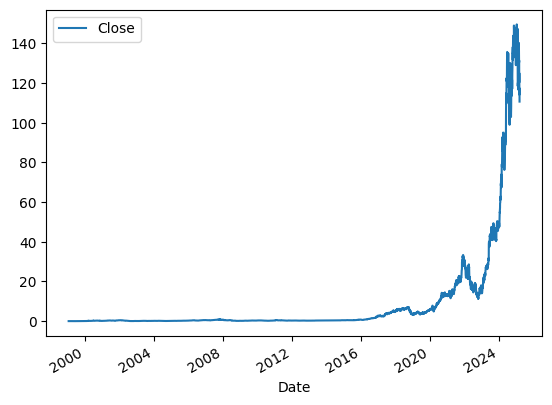

In [6]:
nvda.plot.line(y="Close", use_index=True)

In [7]:
nvda["Tomorrow"] = nvda["Close"].shift(-1)

In [8]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,0.041556
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,0.038331
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,0.038212
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,0.038092
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,0.036301
...,...,...,...,...,...,...,...,...
2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.0,0.0,114.059998
2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.0,0.0,115.989998
2025-03-04 00:00:00-05:00,110.650002,119.309998,110.110001,115.989998,398163300,0.0,0.0,117.300003


In [9]:
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)

In [10]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,0.041556,1
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,0.038331,0
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,0.038212,0
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,0.038092,0
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,0.036301,0
...,...,...,...,...,...,...,...,...,...
2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.0,0.0,114.059998,0
2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.0,0.0,115.989998,1
2025-03-04 00:00:00-05:00,110.650002,119.309998,110.110001,115.989998,398163300,0.0,0.0,117.300003,1


In [11]:
nvda = nvda.loc["2000-01-01":].copy()

In [12]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,0.090276,0.090992,0.084305,0.089440,300912000,0.0,0.0,0.087052,0
2000-01-04 00:00:00-05:00,0.087887,0.088126,0.082633,0.087052,300480000,0.0,0.0,0.084186,0
2000-01-05 00:00:00-05:00,0.084544,0.085977,0.082992,0.084186,188352000,0.0,0.0,0.078692,0
2000-01-06 00:00:00-05:00,0.084186,0.084186,0.075469,0.078692,120480000,0.0,0.0,0.080007,1
2000-01-07 00:00:00-05:00,0.078335,0.080842,0.077141,0.080007,71184000,0.0,0.0,0.082633,1
...,...,...,...,...,...,...,...,...,...
2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.0,0.0,114.059998,0
2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.0,0.0,115.989998,1
2025-03-04 00:00:00-05:00,110.650002,119.309998,110.110001,115.989998,398163300,0.0,0.0,117.300003,1


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nvda.iloc[:-100]
test= nvda.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [15]:
import pandas as pd 

predictions = pd.Series(predictions, index=test.index)

In [16]:
precision_score(test["Target"], predictions)

0.6153846153846154

In [17]:
combined = pd.concat([test["Target"], predictions], axis=1)

<Axes: xlabel='Date'>

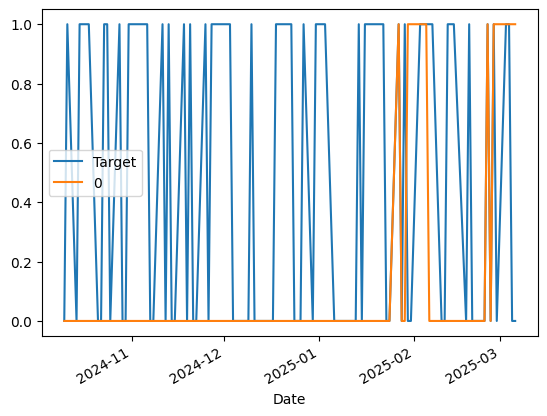

In [18]:
combined.plot()

In [19]:
def predict(train, test, predictors, model): 
        model.fit(train[predictors], train["Target"])
        predictions = model.predict(test[predictors])
        predictions = pd.Series(predictions, index=test.index, name = "Predictions")
        combined = pd.concat([test["Target"], predictions], axis=1)
        return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(nvda, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    2065
1    1767
Name: count, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5178268251273345

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.528445
0    0.471555
Name: count, dtype: float64

In [25]:
#time to add predictors to try to improve our super basic model

In [26]:
horizons = [2, 5, 60, 250, 1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = nvda.rolling(horizon).mean()
    
    ratio_column = f"Close Ratio_{horizon}"
    nvda[ratio_column] = nvda["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nvda[trend_column] = nvda.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [27]:
nvda = nvda.dropna()

In [28]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close Ratio_2,Trend_2,Close Ratio_5,Trend_5,Close Ratio_60,Trend_60,Close Ratio_250,Trend_250,Close Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,0.167903,0.174781,0.167215,0.173788,363960000,0.0,0.0,0.181124,1,1.021103,1.0,1.046287,4.0,1.177282,34.0,1.291599,134.0,0.809514,483.0
2003-12-29 00:00:00-05:00,0.177074,0.181736,0.176234,0.181124,756624000,0.0,0.0,0.181507,1,1.020672,2.0,1.064690,4.0,1.219251,34.0,1.342408,135.0,0.843319,484.0
2003-12-30 00:00:00-05:00,0.179214,0.184946,0.179061,0.181507,550884000,0.0,0.0,0.177303,0,1.001054,2.0,1.042125,4.0,1.214567,34.0,1.341765,135.0,0.844717,485.0
2003-12-31 00:00:00-05:00,0.181430,0.182271,0.174399,0.177303,497268000,0.0,0.0,0.176386,0,0.988284,1.0,1.007030,3.0,1.179850,34.0,1.307471,135.0,0.824774,485.0
2004-01-02 00:00:00-05:00,0.180131,0.182576,0.176386,0.176386,436416000,0.0,0.0,0.182117,1,0.997407,0.0,0.990812,3.0,1.167532,33.0,1.297850,134.0,0.820140,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27 00:00:00-05:00,135.000000,135.009995,120.010002,120.150002,443175800,0.0,0.0,124.919998,1,0.955733,1.0,0.934627,1.0,0.891532,30.0,1.011989,135.0,2.386311,538.0
2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.0,0.0,114.059998,0,1.019464,1.0,0.986325,2.0,0.928456,30.0,1.050543,135.0,2.475476,539.0
2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.0,0.0,115.989998,1,0.954557,1.0,0.924251,2.0,0.850327,29.0,0.958188,134.0,2.255728,538.0


In [29]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [30]:
def predict(train, test, predictors, model): 
        model.fit(train[predictors], train["Target"])
        predictions = model.predict_proba(test[predictors])[:,1]
        predictions[predictions >= .6] = 1
        predictions[predictions < .6] = 0
        predictions = pd.Series(predictions, index=test.index, name = "Predictions")
        combined = pd.concat([test["Target"], predictions], axis=1)
        return combined

In [31]:
predictions = backtest(nvda, model, new_predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0.0    2468
1.0     363
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5674931129476584

## **Analysis of Nvidia Stock Price Prediction Model**

#### **1. Data Overview**

The dataset contains historical stock price data for Nvidia (NVDA) from 1999 to 2025. The key features include:

- Open, High, Low, Close prices
- Trading Volume
- Dividends and Stock Splits
  
A new column, "Tomorrow", was created, representing the next day's closing price, which helps formulate a binary classification target (Target column):

- 1 (Increase in price)
- 0 (Decrease in price)
- 
The dataset was later trimmed from 2000 onwards, reducing the number of records from 6571 to 6332

#### **2. Stock Price Trends** 

A line plot of NVDA's closing price over time shows:

- Slow growth from 1999 to 2016.
- Exponential price increase from 2016 onwards, with notable surges after 2020.
- A volatile trend post-2021, with strong price fluctuations.
    
This reflects Nvidia's market dominance in AI, semiconductors, and gaming, which has contributed to its rapid valuation increase.

#### **3. Machine Learning Model - First Attempt**

**Implemented a RandomForestClassifier with:**
- 100 estimators
- Min_samples_split = 100
- Used closing price, volume, open, high, and low as predictors.
- Split the last 100 rows for testing.

**Initial model results:**
- **Precision score: ~61.5%**
- Predictions vs. actual target values showed high variance, indicating overfitting or lack of sufficient patterns.

#### **4. Model Backtesting**

- Implemented a backtesting strategy, evaluating the model at different time periods.
- Predictions were analyzed across 250-step increments.
- **Final precision score: ~51.7%**
- Class balance:
    - 52.8% price increase (Target = 1)
    - 47.1% price decrease (Target = 0)

The model struggled with consistently predicting upward or downward trends, performing slightly better than random guessing.

#### **5. Feature Engineering - Model Improvement**

To enhance prediction accuracy:
- Added moving averages over different time horizons (2, 5, 60, 250, 1000 days).
- Generated trend features, counting the number of recent days showing an upward trend.

Updated Model Parameters:
- RandomForestClassifier with 200 estimators
- Min_samples_split reduced to 50
- New Predictors: Trend and Close Ratios over multiple time horizons

**Updated Model Results:**
- **Precision Score: 56.7%**
- Predictions Class Balance:
- 0 (Price Decrease) → 2468 occurrences
- 1 (Price Increase) → 363 occurrences

***This improvement in precision suggests that additional historical trend features enhance predictive capabilities.***

## **Conclusion and Insights**

1. Stock prices show clear long-term growth trends, but short-term volatility makes prediction difficult.
2. Early model accuracy (~51-61%) struggled due to limited feature engineering.
3. Adding moving averages and trend-based indicators improved model precision (~56.7%), indicating that price movement is not entirely random.
4. Future improvements:
    - Use deep learning (LSTMs, GRUs) for time-series forecasting.
    - Incorporate macroeconomic indicators, earnings reports, and options market data.
    - Test different classification models (XGBoost, Logistic Regression, etc.).

Overall, this project lays a strong foundation for stock price prediction, demonstrating the importance of historical trends and feature selection in financial forecasting. 